##**Project 1: Stock Market Trend Analysis Using Yahoo Finance**##


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import yfinance as yf

In [ ]:
start_date = '2020-04-15'
end_date = '2025-04-15'
tickers=['NFLX', 'DIS', 'FOXA', 'AMZN', 'ROKU']

In [ ]:
historical_data = yf.download(tickers, start=start_date, end=end_date)['Close'].reset_index()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [ ]:
historical_data.head()

Ticker,Date,AMZN,DIS,FOXA,NFLX,ROKU
0,2020-04-15,115.384003,102.108597,23.993563,426.750000,113.000000
1,2020-04-16,120.409500,100.775055,23.844185,439.170013,128.000000
2,2020-04-17,118.750000,105.328804,25.090542,422.959991,126.800003
3,2020-04-20,119.680496,101.012138,24.329657,437.489990,130.039993
4,2020-04-21,116.405998,99.313126,23.844185,433.829987,123.559998


In [ ]:
historical_data.tail()

Ticker,Date,AMZN,DIS,FOXA,NFLX,ROKU
1252,2025-04-08,170.660004,81.720001,47.450001,870.400024,55.099998
1253,2025-04-09,191.100006,91.440002,51.509998,945.469971,63.860001
1254,2025-04-10,181.220001,85.230003,49.520000,921.169983,59.270000
1255,2025-04-11,184.869995,84.889999,48.889999,918.289978,60.220001
1256,2025-04-14,182.119995,84.660004,49.529999,931.280029,59.500000


In [ ]:
mising_values = historical_data.isnull().sum()
print(mising_values)

Ticker
Date    0
AMZN    0
DIS     0
FOXA    0
NFLX    0
ROKU    0
dtype: int64


In [ ]:
Q1=historical_data.quantile(0.25)
Q3=historical_data.quantile(0.75)
IQR=Q3-Q1

In [ ]:
outliers=historical_data[((historical_data<(Q1-1.5*IQR))|(historical_data>(Q3+1.5*IQR))).any(axis=1)]
print(outliers)

Ticker       Date        AMZN         DIS       FOXA        NFLX        ROKU
188    2021-01-12  156.041504  173.842422  28.024677  494.250000  415.290009
190    2021-01-14  156.373505  171.313644  29.436739  500.859985  418.459991
192    2021-01-19  156.037994  170.157913  28.250607  501.769989  434.140015
193    2021-01-20  163.169006  171.521088  29.201393  586.340027  428.500000
194    2021-01-21  165.349503  169.189896  29.220224  579.840027  423.640015
...           ...         ...         ...        ...         ...         ...
1252   2025-04-08  170.660004   81.720001  47.450001  870.400024   55.099998
1253   2025-04-09  191.100006   91.440002  51.509998  945.469971   63.860001
1254   2025-04-10  181.220001   85.230003  49.520000  921.169983   59.270000
1255   2025-04-11  184.869995   84.889999  48.889999  918.289978   60.220001
1256   2025-04-14  182.119995   84.660004  49.529999  931.280029   59.500000

[134 rows x 6 columns]


In [ ]:
remove_outliers=historical_data[~((historical_data<(Q1-1.5*IQR))|(historical_data>(Q3+1.5*IQR))).any(axis=1)]
print(remove_outliers)

Ticker       Date        AMZN         DIS       FOXA        NFLX        ROKU
0      2020-04-15  115.384003  102.108597  23.993563  426.750000  113.000000
1      2020-04-16  120.409500  100.775055  23.844185  439.170013  128.000000
2      2020-04-17  118.750000  105.328804  25.090542  422.959991  126.800003
3      2020-04-20  119.680496  101.012138  24.329657  437.489990  130.039993
4      2020-04-21  116.405998   99.313126  23.844185  433.829987  123.559998
...           ...         ...         ...        ...         ...         ...
1171   2024-12-09  226.089996  114.104393  46.007977  913.690002   84.120003
1172   2024-12-10  225.039993  114.223869  46.147305  913.349976   81.820000
1173   2024-12-11  230.259995  114.104393  45.848743  936.559998   82.419998
1175   2024-12-13  227.460007  112.839996  46.853897  918.869995   82.989998
1176   2024-12-16  232.929993  112.110001  46.833992  921.080017   83.440002

[1123 rows x 6 columns]


In [ ]:
melted_data=pd.melt(historical_data, id_vars='Date', var_name='Ticker', value_name='Close')
melted_data.head()

,Date,Ticker,Close
0,2020-04-15,AMZN,115.384003
1,2020-04-16,AMZN,120.409500
2,2020-04-17,AMZN,118.750000
3,2020-04-20,AMZN,119.680496
4,2020-04-21,AMZN,116.405998


In [ ]:
melted_data.tail()

,Date,Ticker,Close
6280,2025-04-08,ROKU,55.099998
6281,2025-04-09,ROKU,63.860001
6282,2025-04-10,ROKU,59.270000
6283,2025-04-11,ROKU,60.220001
6284,2025-04-14,ROKU,59.500000


##**QUESTIONS**

**1. What is the overall price trend of the selected stock over the past 5 years?**

In [ ]:
price_trend = ((melted_data['Close'].pct_change().add(1).cumprod().iloc[-1]-1)-1)*100
print(price_trend)

-148.43305950985777


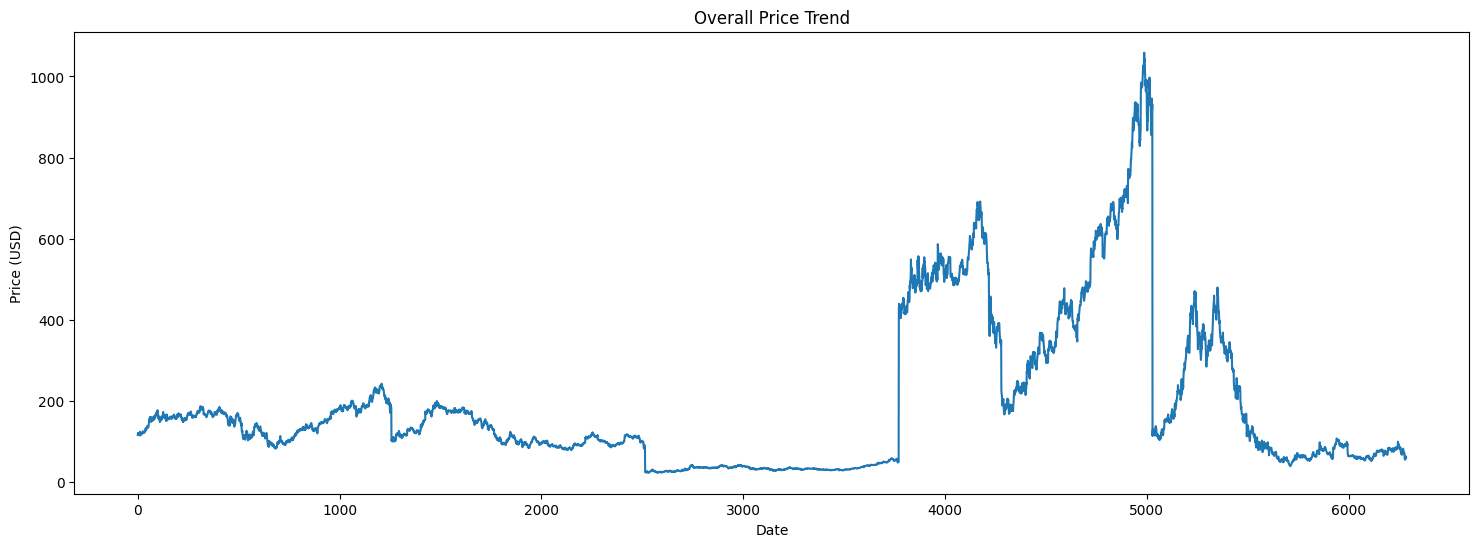

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(melted_data['Close'])
plt.title('Overall Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

2. How do the 50-day and 200-day moving averages compare, and what do they indicate?

In [ ]:
melted_data['50-day MA'] = melted_data['Close'].rolling(window=50).mean()
melted_data['200-day MA'] = melted_data['Close'].rolling(window=200).mean()
melted_data.head()


,Date,Ticker,Close,50-day MA,200-day MA
0,2020-04-15,AMZN,115.384003,NaN,NaN
1,2020-04-16,AMZN,120.409500,NaN,NaN
2,2020-04-17,AMZN,118.750000,NaN,NaN
3,2020-04-20,AMZN,119.680496,NaN,NaN
4,2020-04-21,AMZN,116.405998,NaN,NaN


In [ ]:
melted_data.tail()

,Date,Ticker,Close,50-day MA,200-day MA
6280,2025-04-08,ROKU,55.099998,78.3082,72.311675
6281,2025-04-09,ROKU,63.860001,77.9386,72.358975
6282,2025-04-10,ROKU,59.270000,77.4724,72.383075
6283,2025-04-11,ROKU,60.220001,76.9712,72.410975
6284,2025-04-14,ROKU,59.500000,76.5060,72.422675


In [ ]:
comparison= melted_data['50-day MA']> melted_data['200-day MA']
comparison.head()

,0
0,False
1,False
2,False
3,False
4,False


In [ ]:
comparison.tail()

,0
6280,True
6281,True
6282,True
6283,True
6284,True


THIS INDICATES THAT THE 50-DAY MOVING AVERAGE IS BELOW THE 200-DAY MOVING AVERAGE AND A DOWNWARD TREND/POSSIBLE FURTHER DECLINE WHICH IS BEARISH.

3. What were the highest and lowest volatility periods, and what caused them?

In [ ]:
log_prices = melted_data.pivot(index = "Date", columns = "Ticker", values = "Close")

In [ ]:
log_prices = np.log(log_prices) - np.log(log_prices.shift(1))
log_prices = log_prices.iloc[1:, 0:]
log_prices.head()

Ticker,AMZN,DIS,FOXA,NFLX,ROKU
Date,,,,,
2020-04-16,0.042633,-0.013146,-0.006245,0.028688,0.124642
2020-04-17,-0.013878,0.044196,0.050951,-0.037609,-0.009419
2020-04-20,0.007805,-0.041846,-0.030795,0.033776,0.025231
2020-04-21,-0.027742,-0.016963,-0.020156,-0.008401,-0.051115
2020-04-22,0.015078,0.004466,-0.030613,-0.029023,-0.011150


In [ ]:
log_prices.tail()


Ticker,AMZN,DIS,FOXA,NFLX,ROKU
Date,,,,,
2025-04-08,-0.026597,-0.019150,-0.022918,0.002957,-0.036180
2025-04-09,0.113124,0.112384,0.082099,0.082729,0.147544
2025-04-10,-0.053085,-0.070330,-0.039399,-0.026038,-0.074590
2025-04-11,0.019941,-0.003997,-0.012804,-0.003131,0.015901
2025-04-14,-0.014987,-0.002713,0.013006,0.014047,-0.012028


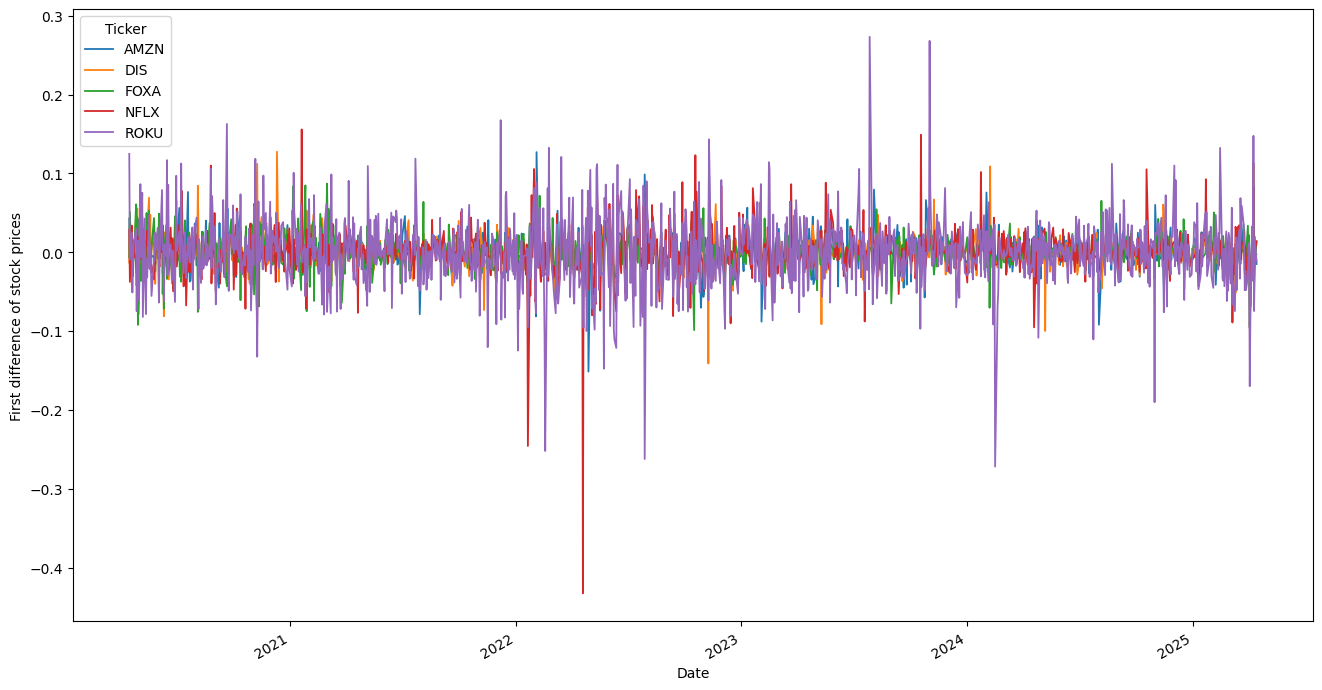

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9)
log_prices.plot(
    linewidth=1.3, xlabel="Date", ylabel="First difference of stock prices")
plt.show()

In [ ]:
print("The period of highest volatility:", log_prices.max())
print("The period of lowest volatility", log_prices.min())

The period of highest volatility: Ticker
AMZN    0.126949
DIS     0.127469
FOXA    0.086939
NFLX    0.155758
ROKU    0.273169
dtype: float64
The period of lowest volatility Ticker
AMZN   -0.151398
DIS    -0.141139
FOXA   -0.098866
NFLX   -0.432578
ROKU   -0.271934
dtype: float64


In [ ]:
melted_data['Upper Band'] = melted_data['Close'].rolling(window=20).mean() + 2 * melted_data['Close'].rolling(window=20).std()
melted_data['Lower Band'] = melted_data['Close'].rolling(window=20).mean() - 2 * melted_data['Close'].rolling(window=20).std()
melted_data.head()

,Date,Ticker,Close,50-day MA,200-day MA,Upper Band,Lower Band
0,2020-04-15,AMZN,115.384003,NaN,NaN,NaN,NaN
1,2020-04-16,AMZN,120.409500,NaN,NaN,NaN,NaN
2,2020-04-17,AMZN,118.750000,NaN,NaN,NaN,NaN
3,2020-04-20,AMZN,119.680496,NaN,NaN,NaN,NaN
4,2020-04-21,AMZN,116.405998,NaN,NaN,NaN,NaN


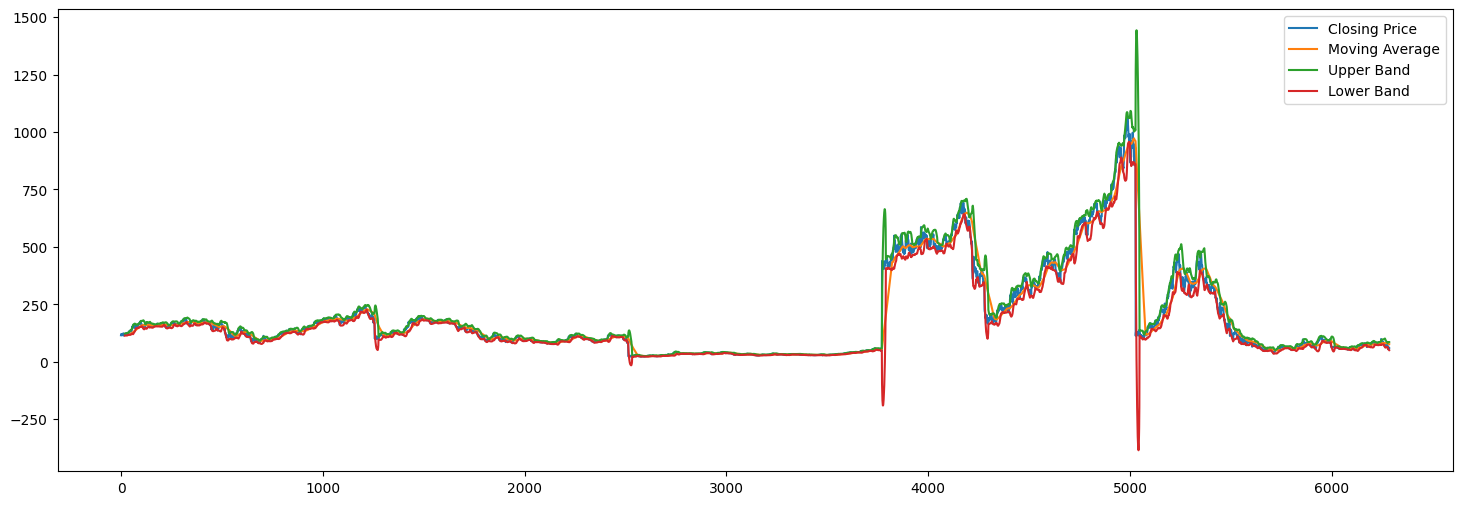

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(melted_data['Close'], label='Closing Price')
plt.plot(melted_data['50-day MA'], label='Moving Average')
plt.plot(melted_data['Upper Band'], label='Upper Band')
plt.plot(melted_data['Lower Band'], label='Lower Band')
plt.legend()
plt.show()

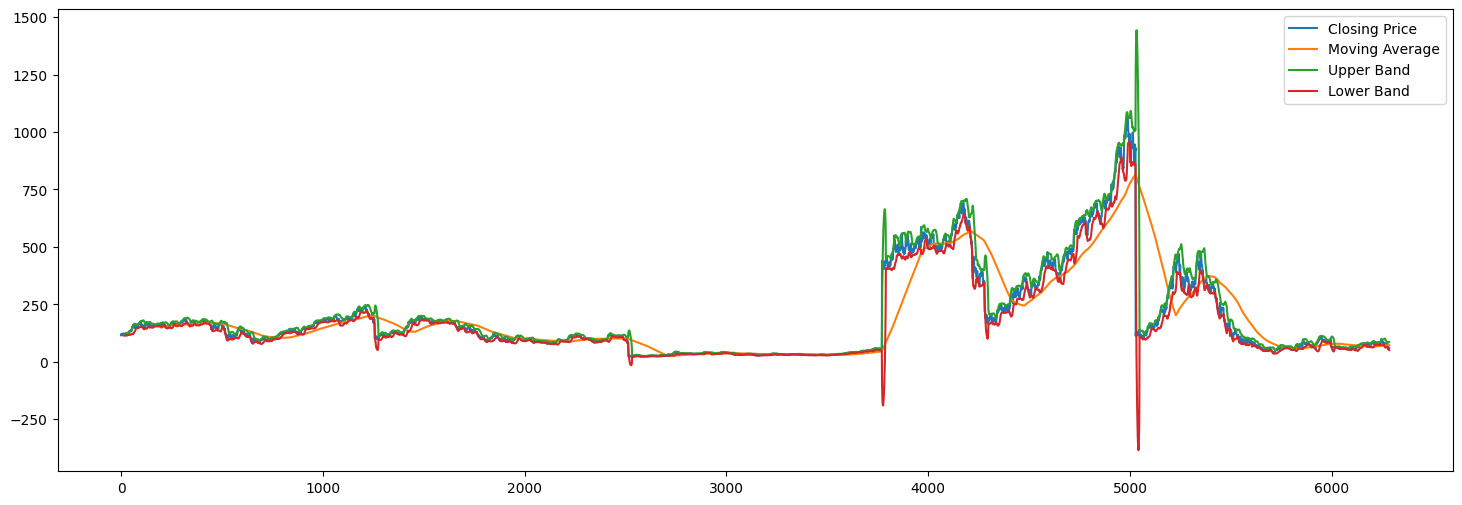

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(melted_data['Close'], label='Closing Price')
plt.plot(melted_data['200-day MA'], label='Moving Average')
plt.plot(melted_data['Upper Band'], label='Upper Band')
plt.plot(melted_data['Lower Band'], label='Lower Band')
plt.legend()
plt.show()